# Tumor Detection Project (Basic)

Random Forest classifier to classify tumors as Malignant (M) or Benign (B).

In [1]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

## 1. Load dataset

In [2]:
import os
p = 'Tumor_Detection.csv'
df = pd.read_csv(p)
print('Loaded:', p)
display(df.head())
print('\nShape:', df.shape)

Loaded: Tumor_Detection.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Shape: (569, 32)


## 2. Data Cleaning

In [3]:
# Drop id/unnamed columns, map diagnosis to target
df_clean = df.copy()
drop_cols = [c for c in df_clean.columns if 'id' in c.lower() or 'unnamed' in c.lower()]
if drop_cols:
    df_clean = df_clean.drop(columns=drop_cols)
# find diagnosis column (case-insensitive)
diag_col = None
for c in df_clean.columns:
    if c.lower() == 'diagnosis' or 'diagnosis' in c.lower():
        diag_col = c
        break
if diag_col is None:
    raise KeyError('Diagnosis column not found.')

df_clean[diag_col] = df_clean[diag_col].astype(str).str.strip().str.upper()
df_clean['target'] = df_clean[diag_col].map({'M':1, 'B':0})
df_clean = df_clean[df_clean['target'].isin([0,1])].copy()

print('Diagnosis column:', diag_col)
print('Counts:')
print(df_clean['target'].value_counts())
display(df_clean.head())

Diagnosis column: diagnosis
Counts:
0    357
1    212
Name: target, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 3. EDA

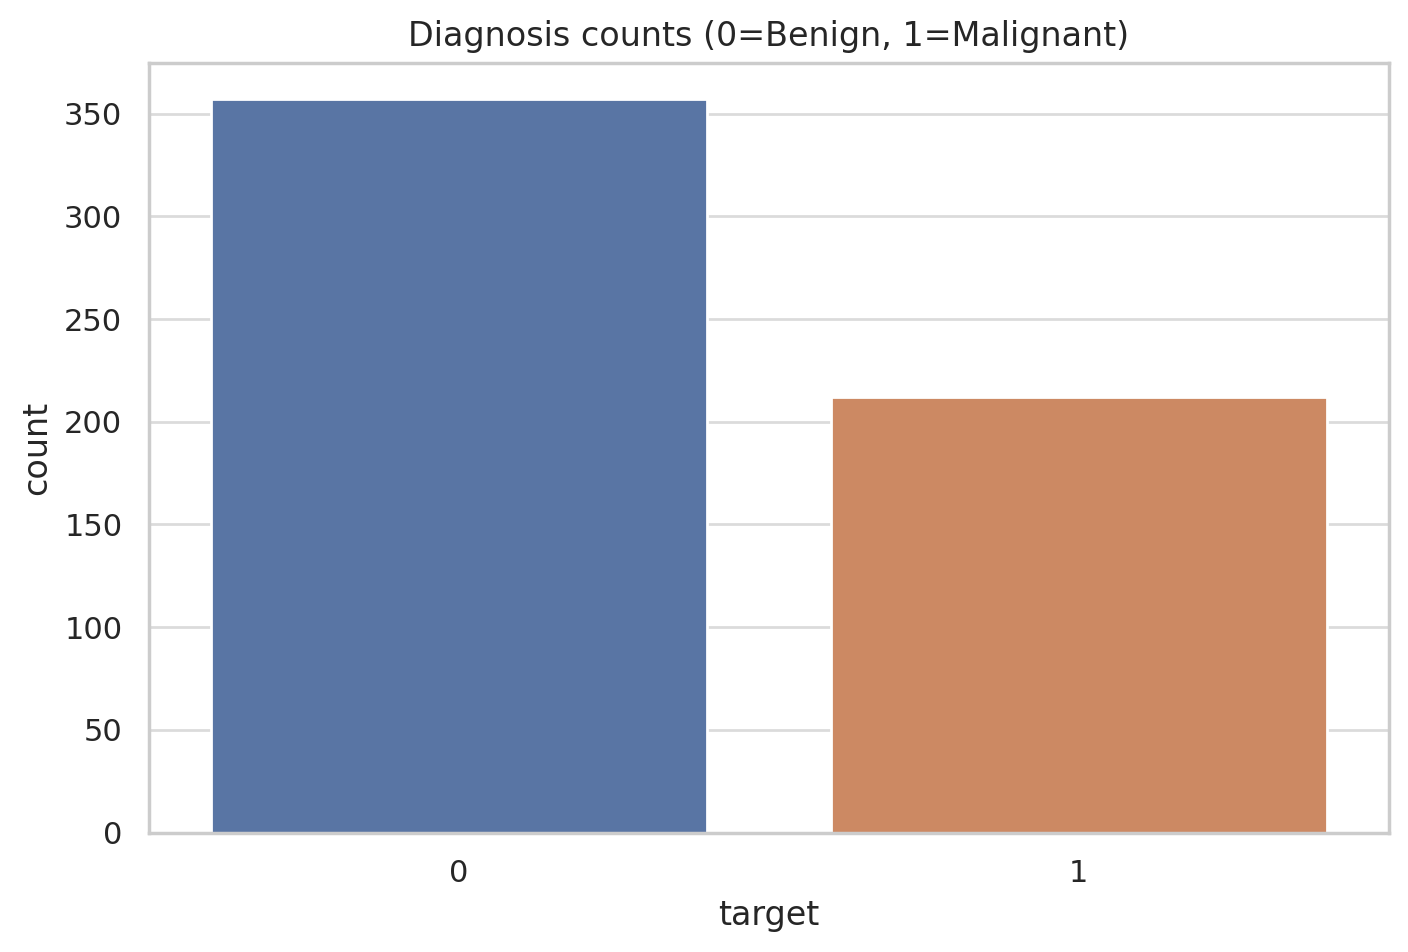

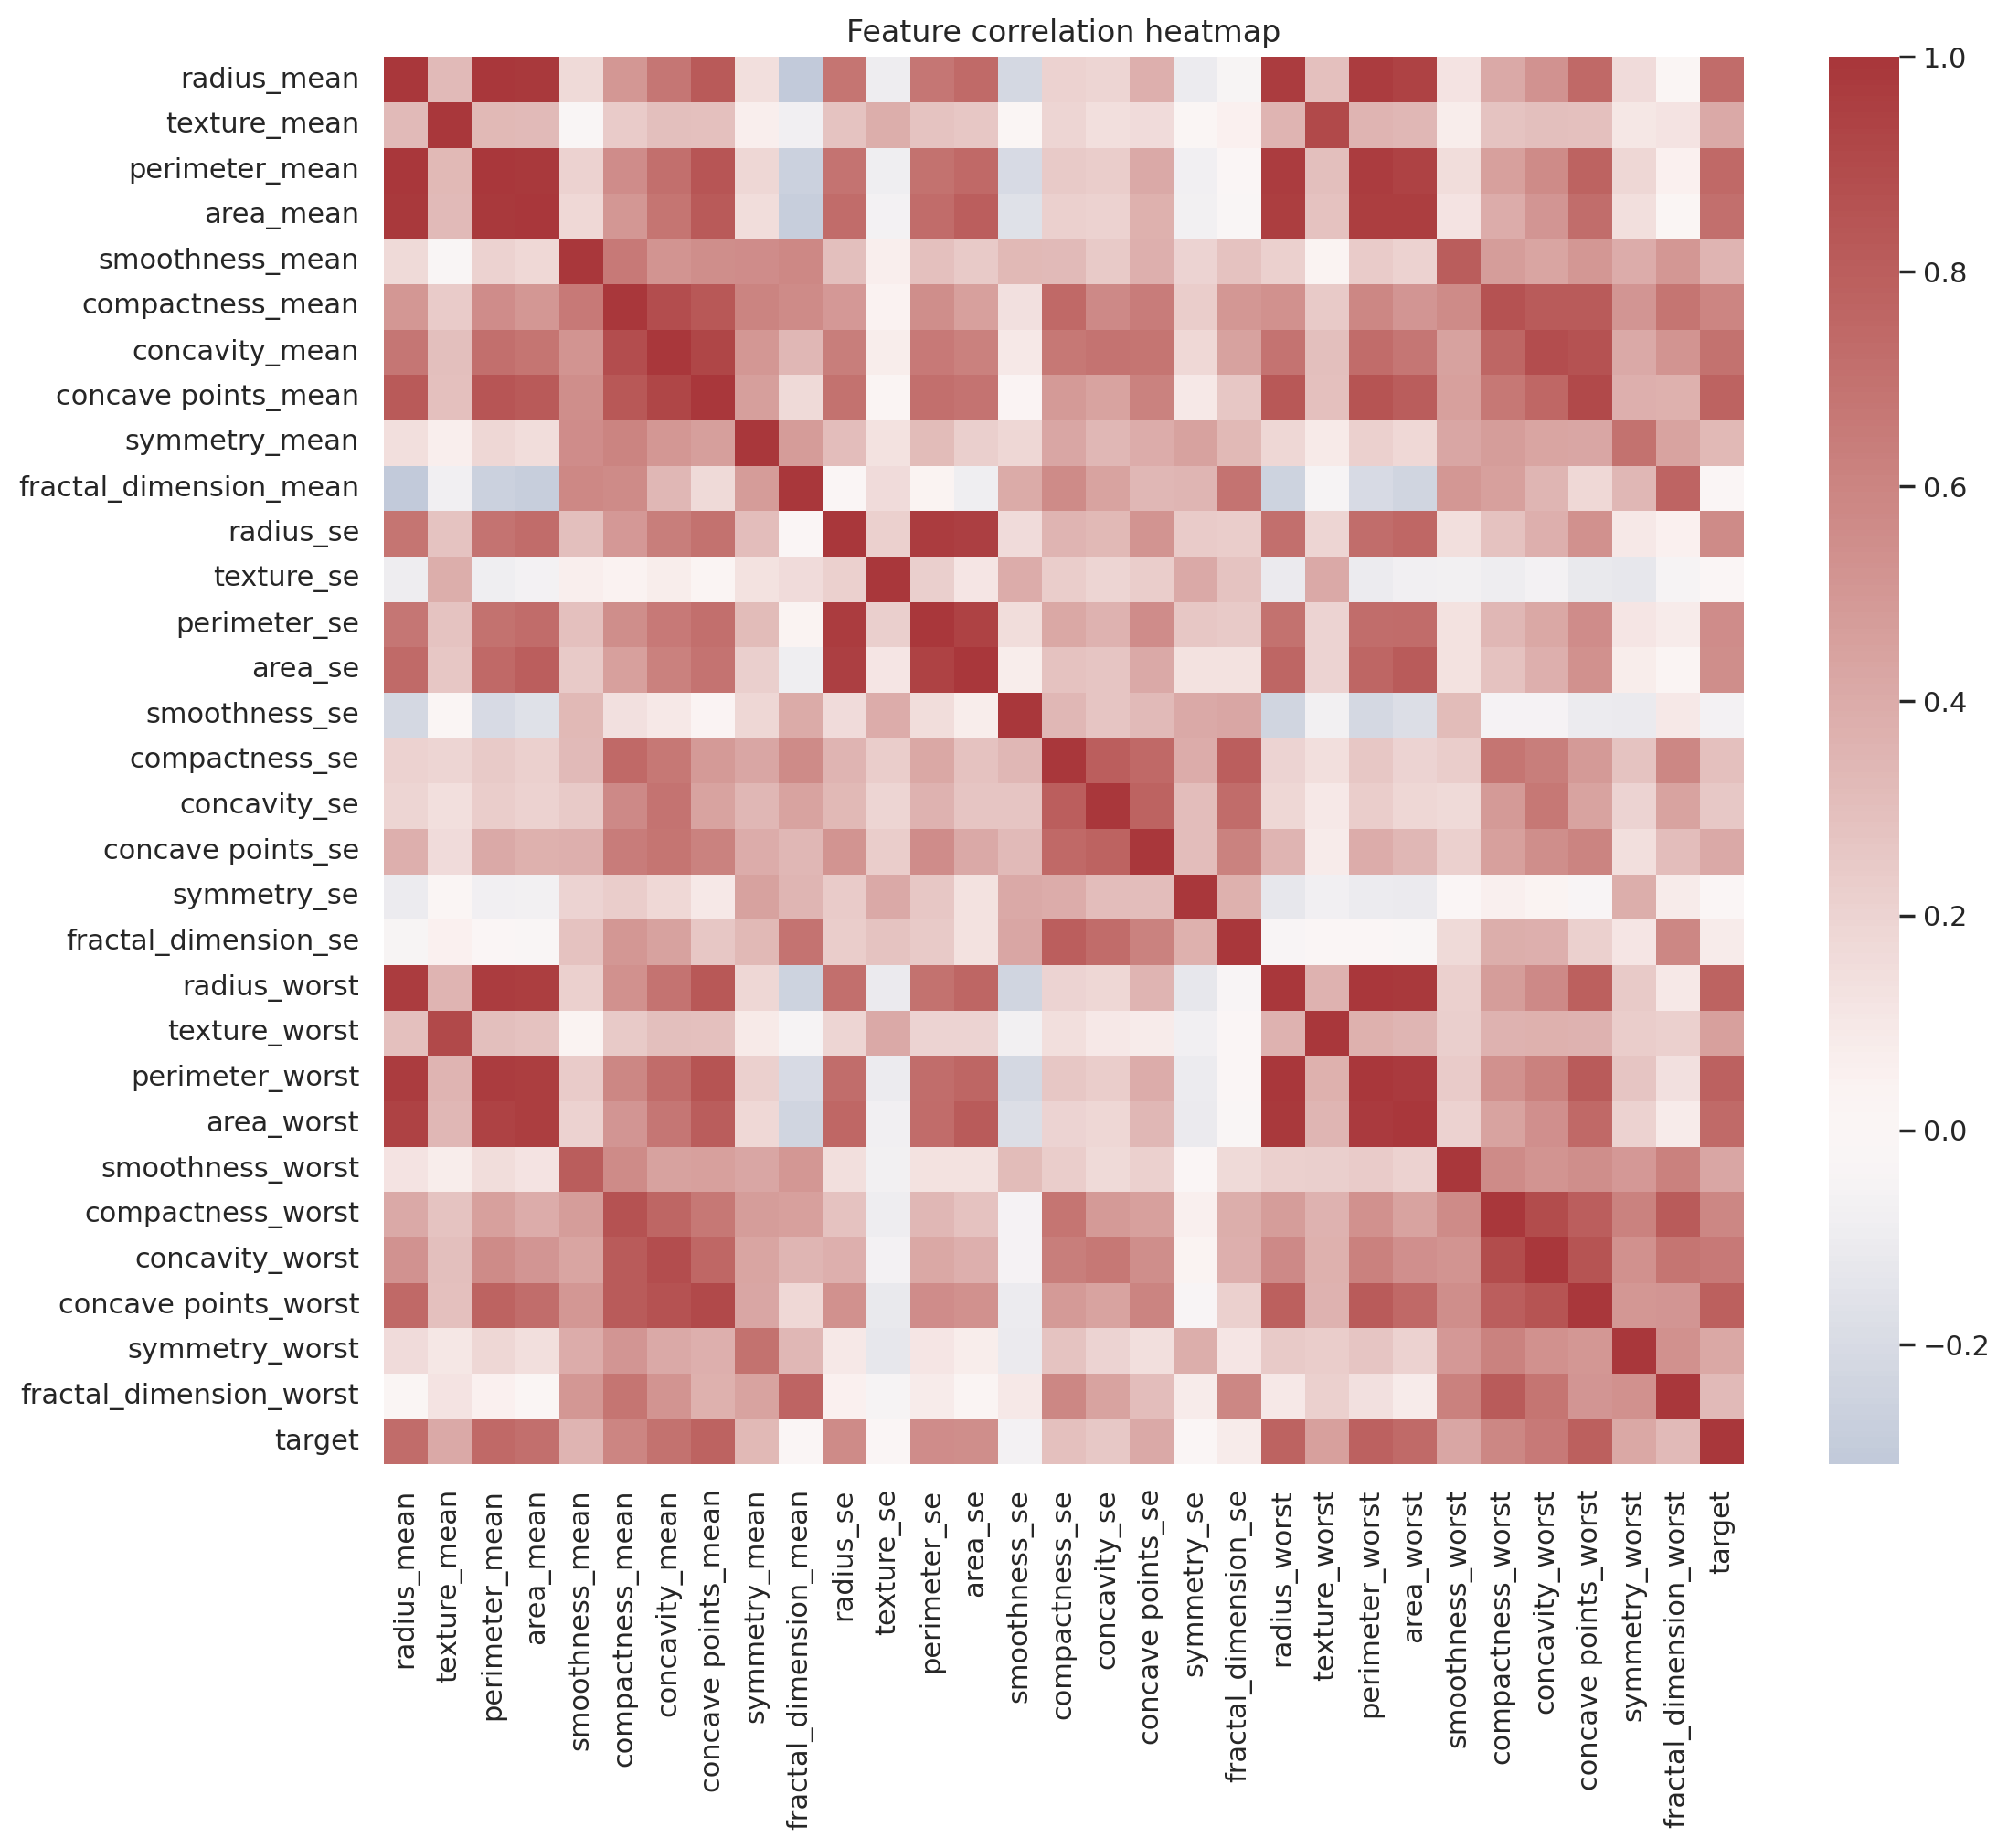

In [4]:
import seaborn as sns, matplotlib.pyplot as plt
sns.countplot(x='target', data=df_clean)
plt.title('Diagnosis counts (0=Benign, 1=Malignant)')
plt.show()

num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'target' in num_cols:
    num_cols.remove('target')
corr = df_clean[num_cols + (['target'] if 'target' in df_clean.columns else [])].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='vlag', center=0)
plt.title('Feature correlation heatmap')
plt.show()

## 4. Modeling - Random Forest

Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



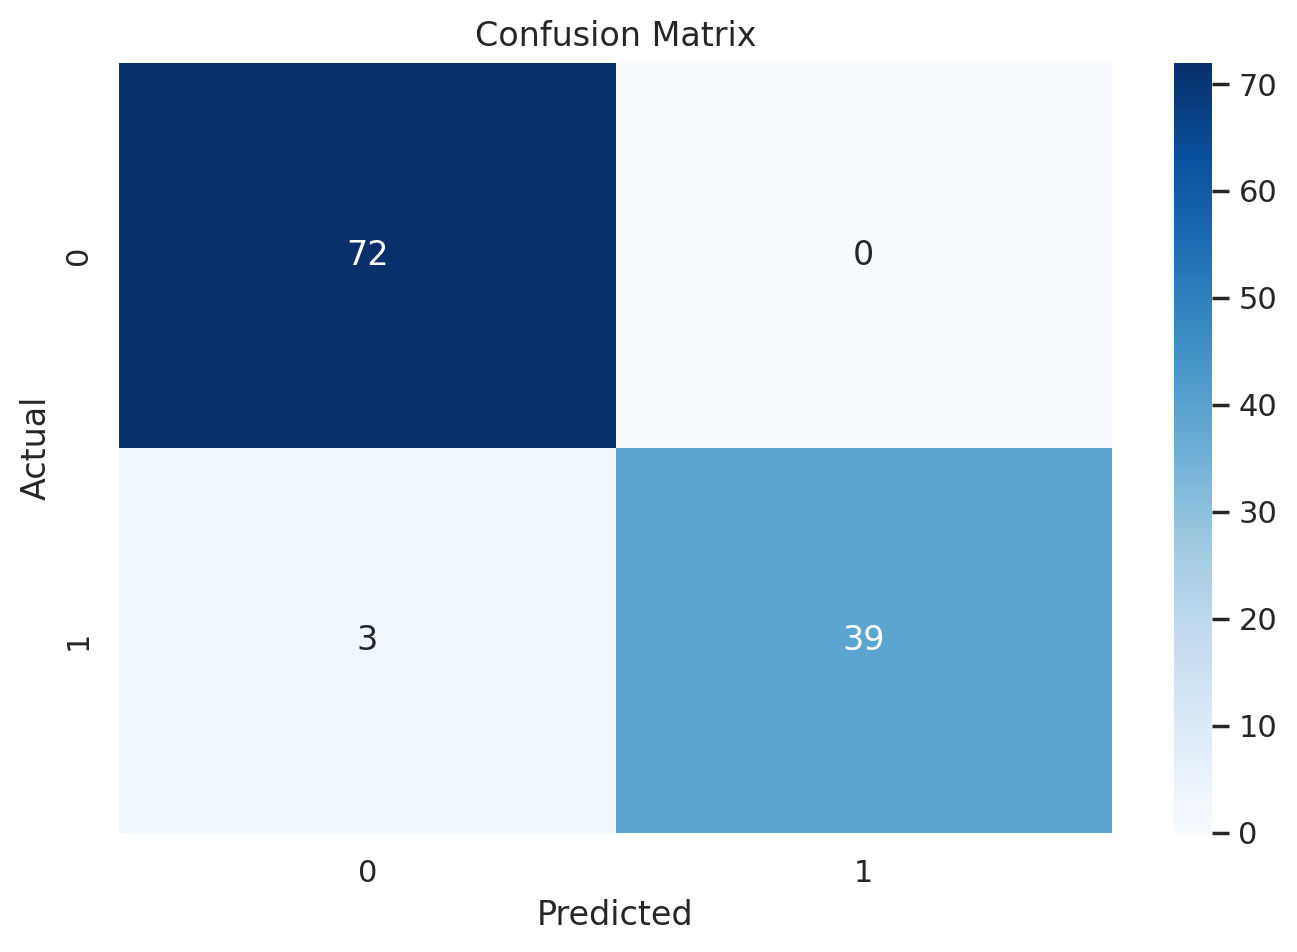

area_worst              0.151412
concave points_worst    0.126497
radius_worst            0.093475
perimeter_worst         0.083642
concave points_mean     0.081082
perimeter_mean          0.077126
radius_mean             0.061990
concavity_mean          0.050818
area_mean               0.045916
concavity_worst         0.030022
area_se                 0.029064
compactness_worst       0.018005
texture_worst           0.016174
texture_mean            0.015545
smoothness_worst        0.015093
dtype: float64

In [5]:
# Prepare X and y
X = df_clean.select_dtypes(include=[np.number]).drop(columns=['target'])
y = df_clean['target']

X = X.fillna(X.median())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
print('Accuracy:', round(accuracy_score(y_test, y_pred),4))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(importances.head(15))

## 5. Conclusions
Random Forest model trained and evaluated.